In [4]:
#샘플링
def sample_paths(npy_files, target_len=60):
    total_len = len(npy_files)
    if total_len >= target_len:
        idxs = np.linspace(0, total_len - 1, target_len).astype(int)
        return [npy_files[i] for i in idxs]
    else:
        pad_count = target_len - total_len
        return npy_files + [npy_files[-1]] * pad_count

In [5]:
DATASET_PATH = "C:\\Users\\chaeyeonhan\\OneDrive\\2025-1\\capstone_design\\WLASL_1"

In [6]:
import os
import unicodedata

MP_DATA_PATH = "C:\\Users\\chaeyeonhan\\OneDrive\\2025-1\\capstone_design\\data\\WLASL_1\\MP_Data_WLASL_Train"
MP_DATA_PATH_TEST = "C:\\Users\\chaeyeonhan\\OneDrive\\2025-1\\capstone_design\\data\\WLASL_1\\MP_Data_WLASL_Test"

def generate_label_map_from_folders(train_path, test_path=None):
    train_labels = set(unicodedata.normalize("NFC", name).strip() for name in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, name)))
    
    if test_path:
        test_labels = set(unicodedata.normalize("NFC", name).strip() for name in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, name)))
        common_labels = sorted(train_labels & test_labels)
    else:
        common_labels = sorted(train_labels)

    return {label: idx for idx, label in enumerate(common_labels)}



In [7]:
import numpy as np
import os
import unicodedata

MP_DATA_PATH = "C:\\Users\\chaeyeonhan\\OneDrive\\2025-1\\capstone_design\\data\\WLASL_1\\MP_Data_WLASL_Train"
MP_DATA_PATH_TEST = "C:\\Users\\chaeyeonhan\\OneDrive\\2025-1\\capstone_design\\data\\WLASL_1\\MP_Data_WLASL_Test"


#  datalist 생성 함수
def process_datalist(data_path, label_map, sequence_length=60):
    data_list = []
    for label in os.listdir(data_path):
        label = unicodedata.normalize("NFC", label).strip()
        label_path = os.path.join(data_path, label)
        if not os.path.isdir(label_path):
            continue

        if label not in label_map:
            print(f"⚠️ Warning: Label '{label}' not in label_map → Skipped")
            continue

        for video_id in os.listdir(label_path):
            video_path = os.path.join(label_path, video_id)
            if not os.path.isdir(video_path):
                continue

            npy_files = sorted(
                [os.path.join(video_path, f) for f in os.listdir(video_path) if f.endswith(".npy")]
            )

            if len(npy_files) == 0:
                continue

            selected_files = sample_paths(npy_files, target_len=sequence_length)
            label_idx = label_map[label]
            data_list.append((selected_files, label_idx))

    return data_list

#   label_map 생성
label_map = generate_label_map_from_folders(MP_DATA_PATH, MP_DATA_PATH_TEST)


# train/test 데이터 생성 (같은 label_map 사용)
train_data = process_datalist(MP_DATA_PATH, label_map=label_map)
test_data = process_datalist(MP_DATA_PATH_TEST, label_map=label_map)

print(f" train_data: {len(train_data)}개")
print(f" test_data: {len(test_data)}개")
print(f" 클래스 개수: {len(label_map)}개")


⚠️ Warning: Label 'blue' not in label_map → Skipped
⚠️ Warning: Label 'deaf' not in label_map → Skipped
⚠️ Warning: Label 'dog' not in label_map → Skipped
⚠️ Warning: Label 'fine' not in label_map → Skipped
⚠️ Warning: Label 'kiss' not in label_map → Skipped
⚠️ Warning: Label 'thanksgiving' not in label_map → Skipped
⚠️ Warning: Label 'walk' not in label_map → Skipped
⚠️ Warning: Label 'what' not in label_map → Skipped
 train_data: 822개
 test_data: 118개
 클래스 개수: 42개


In [8]:
# label_map 키 목록 보기
print("label_map keys:", list(label_map.keys()))

# test 폴더 내 라벨 이름 비교
print("test 라벨 폴더:", os.listdir(MP_DATA_PATH_TEST))


label_map keys: ['all', 'bed', 'before', 'black', 'book', 'bowling', 'can', 'candy', 'chair', 'clothes', 'computer', 'cool', 'cousin', 'drink', 'family', 'finish', 'fish', 'go', 'graduate', 'hat', 'hearing', 'help', 'hot', 'language', 'later', 'like', 'man', 'many', 'mother', 'no', 'now', 'orange', 'shirt', 'study', 'table', 'tall', 'thin', 'white', 'who', 'woman', 'year', 'yes']
test 라벨 폴더: ['all', 'bed', 'before', 'black', 'book', 'bowling', 'can', 'candy', 'chair', 'clothes', 'computer', 'cool', 'cousin', 'drink', 'family', 'finish', 'fish', 'go', 'graduate', 'hat', 'hearing', 'help', 'hot', 'language', 'later', 'like', 'man', 'many', 'mother', 'no', 'now', 'orange', 'shirt', 'study', 'table', 'tall', 'thin', 'white', 'who', 'woman', 'year', 'yes']


전체 샘플 수: 968
 평균 길이: 63.69
 최대 길이: 203, 최소 길이: 12
상위 95% 커버 길이: 113


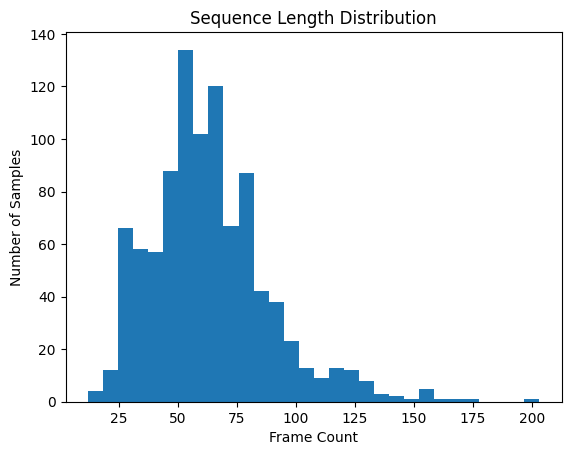

In [21]:
import matplotlib.pyplot as plt

def get_frame_lengths(data_path):
    lengths = []
    for label in os.listdir(data_path):
        label = unicodedata.normalize("NFC", label)
        label_path = os.path.join(data_path, label)
        if not os.path.isdir(label_path):
            continue
        for video_id in os.listdir(label_path):
            video_path = os.path.join(label_path, video_id)
            npy_files = [f for f in os.listdir(video_path) if f.endswith(".npy")]
            lengths.append(len(npy_files))
    return lengths

# 길이 추출 및 시각화
lengths = get_frame_lengths(MP_DATA_PATH)
print(f"전체 샘플 수: {len(lengths)}")
print(f" 평균 길이: {sum(lengths)/len(lengths):.2f}")
print(f" 최대 길이: {max(lengths)}, 최소 길이: {min(lengths)}")
print(f"상위 95% 커버 길이: {int(np.percentile(lengths, 95))}")

plt.hist(lengths, bins=30)
plt.title("Sequence Length Distribution")
plt.xlabel("Frame Count")
plt.ylabel("Number of Samples")
plt.show()


In [14]:
import numpy as np

# train_data = [([npy1, npy2, ..., npy60], label), ...] 형태일 경우
sample_npy_path = train_data[0][0][0]  # 첫 번째 샘플의 첫 프레임
frame = np.load(sample_npy_path)

print("✅ 샘플 프레임 파일 경로:", sample_npy_path)
print("✅ 프레임 shape:", frame.shape)
print("✅ 프레임 dtype:", frame.dtype)
print("✅ 프레임 내용 일부:", frame.flatten()[:10])


✅ 샘플 프레임 파일 경로: C:\Users\chaeyeonhan\OneDrive\2025-1\capstone_design\data\WLASL_1\MP_Data_WLASL_Train\all\01912\0.npy
✅ 프레임 shape: (543, 3)
✅ 프레임 dtype: float64
✅ 프레임 내용 일부: [ 0.52935016  0.3379291  -0.02025094  0.52813447  0.31469774 -0.03267343
  0.52792418  0.32178685 -0.01787342  0.52150249]


In [9]:
import os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, Masking, Attention, Bidirectional,GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

### 증강 함수들
def add_gaussian_noise(data, std=0.01):
    return data + np.random.normal(0, std, data.shape)

def time_masking(data, max_mask_ratio=0.2):
    masked = data.copy()
    num_frames = data.shape[0]
    num_mask = int(num_frames * max_mask_ratio)
    mask_indices = np.random.choice(num_frames, num_mask, replace=False)
    masked[mask_indices] = 0
    return masked

def normalize_frames(frames):
    return [(f - np.mean(f)) / (np.std(f) + 1e-6) for f in frames]

def smooth_labels(labels, smoothing=0.1):
    n_classes = labels.shape[1]
    return labels * (1 - smoothing) + (smoothing / n_classes)

#속도 왜곡
def time_warping(frames, stretch_factor=0.1):
    length = len(frames)
    factor = 1 + np.random.uniform(-stretch_factor, stretch_factor)
    indices = np.linspace(0, length-1, int(length * factor)).astype(int)
    indices = np.clip(indices, 0, length-1)
    return np.array(frames)[indices]

#각 keypoint 위치에 변동 추가
def jitter(frames, sigma=0.01):
    return frames + np.random.normal(loc=0, scale=sigma, size=frames.shape)



###  데이터 생성 + 증강 통합 함수
def make_augmented_dataset(split_data, augment_multiplier=10):
    X, y = [], []
    for npy_files, label in tqdm(split_data):
        frames = [np.load(npy_file).flatten() for npy_file in npy_files]

        frames = sample_paths(frames, target_len=60)

        frames = normalize_frames(frames)
        original = np.stack(frames)  # shape: (60, 1629)
        X.append(original)
        y.append(label)

        aug_funcs = [add_gaussian_noise, time_masking, time_warping, jitter]

        for _ in range(augment_multiplier):
            aug = original.copy()
            # 무작위로 1~2개 증강 선택 후 순서대로 적용
            selected_augs = np.random.choice(aug_funcs, size=np.random.randint(1, 3), replace=False)
            for func in selected_augs:
                aug = func(aug)

            # 프레임 수 보정 및 정규화
            aug = sample_paths([f for f in aug], target_len=60)
            aug = normalize_frames(aug)
            aug = np.stack(aug)

            X.append(aug)
            y.append(label)

      

    return np.array(X), np.array(y)



# 학습

## top-k 분산 기반 feature 선정

In [7]:
#top-k 분산 기반 feature masking 사용
import numpy as np

def apply_topk_feature_masking(X, k=100):
    # Flatten across time: (N*60, 1629)
    X_flat = X.reshape(-1, X.shape[-1])
    
    # Feature-wise variance
    variances = np.var(X_flat, axis=0)
    
    # Top-k feature indices
    topk_indices = np.argsort(variances)[-k:]
    
    # Apply masking
    X_reduced = X[:, :, topk_indices]  # shape: (N, 60, k)
    
    return X_reduced, topk_indices

## pca 축소

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def find_optimal_k_with_pca(X, threshold=0.95):
    N, T, D = X.shape
    X_flat = X.reshape(-1, D)

    # PCA 전체 주성분 학습
    pca = PCA(n_components=D)
    pca.fit(X_flat)

    # 누적 분산 설명 비율
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)

    # 임계값 이상이 되는 k 찾기
    optimal_k = np.argmax(cum_var_ratio >= threshold) + 1

    # 시각화
    plt.figure(figsize=(8, 5))
    plt.plot(cum_var_ratio, marker='o')
    plt.axhline(y=threshold, color='r', linestyle='--')
    plt.axvline(x=optimal_k, color='g', linestyle='--')
    plt.title("Cumulative Explained Variance Ratio")
    plt.xlabel("Number of Components (k)")
    plt.ylabel("Cumulative Variance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f" {threshold*100:.0f}% 분산을 설명하기 위한 최적의 k: {optimal_k}")
    return optimal_k, pca

In [10]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train_data, test_size=0.2, random_state=42,
                              stratify=[label for _, label in train_data])

X_train_raw, y_train = make_augmented_dataset(train, augment_multiplier=10)
X_val_raw, y_val = make_augmented_dataset(val, augment_multiplier=0)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_train = smooth_labels(y_train, smoothing=0.1)

100%|██████████| 165/165 [00:59<00:00,  2.79it/s]


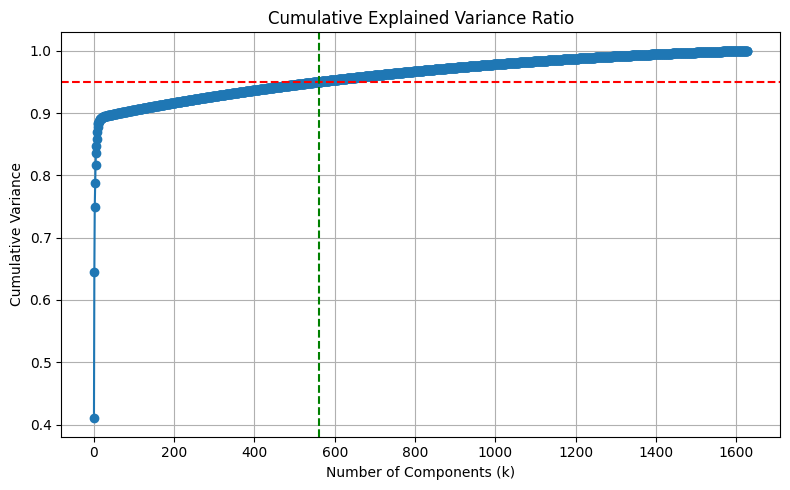

 95% 분산을 설명하기 위한 최적의 k: 560


In [11]:
optimal_k, pca_model = find_optimal_k_with_pca(X_train_raw, threshold=0.95)

# 모델 학습

## topk

In [19]:
from sklearn.utils.class_weight import compute_class_weight

###  모델 구조
def build_lstm_gru_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
 
    x = Bidirectional(LSTM(96, return_sequences=True))(inputs)
    x = BatchNormalization()(x)
    x= Dropout(0.4)(x)
    
    x = GRU(units=32, return_sequences=True)(x)
    x= BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Attention()([x,x])
    x = GlobalAveragePooling1D()(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

###  학습 파이프라인

train, val = train_test_split(train_data, test_size=0.2, random_state=42,
                              stratify=[label for _, label in train_data])

# stratify split 이후 바로 넣기
train_labels = np.array([label for _, label in train])
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_labels), y=train_labels)
class_weight_dict = dict(enumerate(class_weights))

X_train_raw, y_train = make_augmented_dataset(train, augment_multiplier=10)
X_val_raw, y_val = make_augmented_dataset(val, augment_multiplier=0)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_train = smooth_labels(y_train, smoothing=0.1)

accs = []
k_list = [ 300, 500, 800, 1000, 1200, 1629]

for k in k_list:
    X_train_k, topk = apply_topk_feature_masking(X_train_raw, k=k)
    X_val_k = X_val_raw[:, :, topk]
    X_train_k = X_train_k.reshape(X_train_k.shape[0], X_train_k.shape[1], -1)
    X_val_k = X_val_k.reshape(X_val_k.shape[0], X_val_k.shape[1], -1)

    model = build_lstm_gru_model((60, k), y_train.shape[1])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stop = EarlyStopping(patience=15, restore_best_weights=True)

    history = model.fit(X_train_k, y_train,
                        validation_data=(X_val_k, y_val),
                        epochs=250,
                        batch_size=32,
                        class_weight=class_weight_dict,
                        callbacks=[early_stop],
                        verbose=1)

    val_acc = history.history['val_accuracy'][-1]
    accs.append(val_acc)
    print(f" Top-{k} feature 정확도: {val_acc:.4f}")
    
    np.save(f"{DATASET_PATH}/42class_topk_indices_{k}.npy", topk)

    #  매번 저장
    if not os.path.exists(f"{DATASET_PATH}/models"):
        os.makedirs(f"{DATASET_PATH}/models")
    model.save(f"{DATASET_PATH}/models/42class_lstm_gru_topk_{k}.keras")

100%|██████████| 165/165 [00:50<00:00,  3.28it/s]


Epoch 1/250
226/226 [==============================] - 8s 21ms/step - loss: 3.1713 - accuracy: 0.1669 - val_loss: 3.1468 - val_accuracy: 0.1030
Epoch 2/250
226/226 [==============================] - 4s 17ms/step - loss: 2.4887 - accuracy: 0.3577 - val_loss: 2.7550 - val_accuracy: 0.2000
Epoch 3/250
226/226 [==============================] - 4s 18ms/step - loss: 2.0348 - accuracy: 0.5326 - val_loss: 3.1493 - val_accuracy: 0.1697
Epoch 4/250
226/226 [==============================] - 4s 17ms/step - loss: 1.7294 - accuracy: 0.6537 - val_loss: 2.8739 - val_accuracy: 0.2545
Epoch 5/250
226/226 [==============================] - 4s 17ms/step - loss: 1.5264 - accuracy: 0.7332 - val_loss: 2.4824 - val_accuracy: 0.3515
Epoch 6/250
226/226 [==============================] - 4s 17ms/step - loss: 1.3925 - accuracy: 0.7922 - val_loss: 2.3125 - val_accuracy: 0.3818
Epoch 7/250
226/226 [==============================] - 4s 17ms/step - loss: 1.2802 - accuracy: 0.8499 - val_loss: 2.7510 - val_accuracy:

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [20]:
from collections import Counter
import numpy as np

val_labels = np.argmax(y_val, axis=1)
print("📊 Validation 클래스 분포:", Counter(val_labels))


📊 Validation 클래스 분포: Counter({4: 7, 13: 6, 8: 5, 17: 5, 10: 5, 27: 4, 1: 4, 7: 4, 15: 4, 9: 4, 11: 4, 20: 4, 14: 4, 5: 4, 25: 4, 29: 4, 41: 4, 33: 4, 6: 4, 2: 4, 31: 4, 36: 4, 21: 4, 39: 4, 34: 4, 40: 4, 12: 4, 22: 4, 28: 4, 3: 4, 38: 4, 23: 3, 0: 3, 32: 3, 30: 3, 37: 3, 18: 3, 26: 3, 35: 3, 24: 3, 19: 3, 16: 3})


In [21]:
from sklearn.metrics import classification_report

y_val_pred = model.predict(X_val_k)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
print(classification_report(np.argmax(y_val, axis=1), y_val_pred_labels, zero_division=0))


6/6 [==============================] - 1s 35ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         4
           7       0.02      1.00      0.05         4
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      

## pca학습

In [23]:
X_test_raw, y_test = make_augmented_dataset(test_data, augment_multiplier=0)
y_test = to_categorical(y_test)

100%|██████████| 118/118 [00:35<00:00,  3.31it/s]


In [24]:
from tensorflow.keras.models import load_model

test_accs = []
k_list = [300, 500, 800, 1000, 1200 ,1629]

for k in k_list:
    # 1. 학습 때 저장한 topk 인덱스를 불러오기
    topk = np.load(f"{DATASET_PATH}/42class_topk_indices_{k}.npy")
    X_test_k = X_test_raw[:, :, topk]

    # 2. 모델 불러오기
    model_path = f"{DATASET_PATH}/models/42class_lstm_gru_topk_{k}.keras"
    model = load_model(model_path)

    # 3. 평가
    test_loss, test_acc = model.evaluate(X_test_k, y_test, verbose=0)
    test_accs.append(test_acc)
    print(f" Top-{k} feature → Test 정확도: {test_acc:.4f}")


 Top-300 feature → Test 정확도: 0.5932
 Top-500 feature → Test 정확도: 0.6356
 Top-800 feature → Test 정확도: 0.4153


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\chaeyeonhan\\OneDrive\\2025-1\\capstone_design\\WLASL_1/42class_topk_indices_1000.npy'

In [11]:
#hyperparameter tuner
from keras_tuner.tuners import BayesianOptimization
from kerastuner import HyperModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, LayerNormalization, Bidirectional, Attention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
import os
from sklearn.utils.class_weight import compute_class_weight



#  데이터 준비
best_k = 500
train, val = train_test_split(train_data, test_size=0.2, random_state=42,
                              stratify=[label for _, label in train_data])

train_labels = np.array([label for _, label in train])
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_labels), y=train_labels)
class_weight_dict = dict(enumerate(class_weights)) 

X_train_raw, y_train = make_augmented_dataset(train, augment_multiplier=10)
X_val_raw, y_val = make_augmented_dataset(val, augment_multiplier=0)
X_train_k, topk = apply_topk_feature_masking(X_train_raw, 500)
X_val_k = X_val_raw[:, :, topk]

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_train = smooth_labels(y_train, smoothing=0.1)
num_classes = y_train.shape[1]
input_shape = (60, best_k)

#  튜닝 가능한 모델 정의
class LSTMGRUHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        inputs = Input(shape=self.input_shape)

        x = Bidirectional(LSTM(units=hp.Int('lstm_units', 32, 128, step=32), return_sequences=True))(inputs)
        x = LayerNormalization()(x)
        x = Dropout(hp.Float('lstm_dropout', 0.2, 0.5, step=0.1))(x)
        
        x = GRU(units=hp.Int('gru_units', 32, 128, step=32), return_sequences=True)(x)
        x = LayerNormalization()(x)
        x = Dropout(hp.Float('gru_dropout', 0.2, 0.5, step=0.1))(x)

        x = Attention()([x, x])                # Soft attention
        x = GlobalAveragePooling1D()(x)

        x = Dense(units=hp.Int('dense_units', 32, 128, step=32), activation='relu')(x)
        x = Dropout(hp.Float('dense_dropout', 0.2, 0.5, step=0.1))(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)

        model = Model(inputs, outputs)
        model.compile(
            optimizer=Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

# 튜너 설정 및 탐색 시작
hypermodel = LSTMGRUHyperModel(input_shape=input_shape, num_classes=num_classes)

tuner = BayesianOptimization(
    hypermodel,
    objective='val_accuracy',
    max_trials=15,  # 하이퍼파라미터 조합 시도 수
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name = f'sign_tune_k{best_k}',
    overwrite=True
)

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-5,
    verbose=1
)
tuner.search(X_train_k, y_train,
             validation_data=(X_val_k, y_val),
             epochs=150,
             batch_size=64,
             callbacks=[EarlyStopping(patience=10, restore_best_weights=True),lr_schedule],
             class_weight=class_weight_dict,
             verbose=1)




Trial 15 Complete [00h 01m 55s]
val_accuracy: 0.5515151619911194

Best val_accuracy So Far: 0.6121212244033813
Total elapsed time: 00h 19m 08s


In [12]:
#  최적 모델/하이퍼파라미터 불러오기
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]
# topk 인덱스 저장
np.save(f"{DATASET_PATH}/best_hypertuning.npy", topk)

#  성능 평가 및 저장

val_acc = best_model.evaluate(X_val_k, y_val, verbose=0)[1]
print(f" [k={best_k}] 튜너 기반 최적 모델의 검증 정확도: {val_acc:.4f}")
print(" Best Hyperparameters:", best_hp.values)

# 
if not os.path.exists(f"{DATASET_PATH}/models"):
    os.makedirs(f"{DATASET_PATH}/models")
best_model.save(f"{DATASET_PATH}/models/best_hypertuning.keras")

 [k=500] 튜너 기반 최적 모델의 검증 정확도: 0.6121
 Best Hyperparameters: {'lstm_units': 64, 'lstm_dropout': 0.30000000000000004, 'gru_units': 96, 'gru_dropout': 0.2, 'dense_units': 32, 'dense_dropout': 0.30000000000000004, 'lr': 0.0005722190383645655}


In [21]:


# 1. 새로운 증강 데이터 적용
train, val = train_test_split(train_data, test_size=0.2, random_state=42,
                              stratify=[label for _, label in train_data])
X_train_aug_raw, y_train_aug = make_augmented_dataset(train, augment_multiplier=10)
X_val_raw, y_val = make_augmented_dataset(val, augment_multiplier=0)

#클래스 불균형
y_train_labels = y_train_aug
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weight_dict = dict(enumerate(class_weights))


# 2. 저장된 topk 인덱스를 로드하여 동일한 feature 사용
topk = np.load(f"{DATASET_PATH}/topk_indices_500.npy")
X_train_aug = X_train_aug_raw[:, :, topk]
X_val = X_val_raw[:, :, topk]

# 3. 라벨 처리
num_classes = y_train.shape[1]
y_train_aug = to_categorical(y_train_aug, num_classes=num_classes)
y_train_aug = smooth_labels(y_train_aug, smoothing=0.1)
y_val = to_categorical(y_val, num_classes=num_classes)

# 4. best_hp로 모델 재정의

input_shape = (60, 500)
model_input = Input(shape=input_shape)

x = Bidirectional(LSTM(64, return_sequences=True))(model_input)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = GRU(units=96, return_sequences=True)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Attention()([x, x])
x = GlobalAveragePooling1D()(x)
x = Dense(units=96, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(model_input, output)

# x = Bidirectional(LSTM(units=best_hp.get('lstm_units'), return_sequences=True))(model_input)
# x = BatchNormalization()(x)
# x = Dropout(best_hp.get('lstm_dropout'))(x)

# x = GRU(units=best_hp.get('gru_units'), return_sequences=True)(x)
# x = BatchNormalization()(x)
# x = Dropout(best_hp.get('gru_dropout'))(x)

# x = Attention()([x, x])
# x = GlobalAveragePooling1D()(x)

# x = Dense(units=best_hp.get('dense_units'), activation='relu')(x)
# x = Dropout(0.3)(x)
# output = Dense(num_classes, activation='softmax')(x)

model = Model(model_input, output)
model.compile(
    optimizer=Adam(learning_rate=best_hp.get('lr')),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. 학습
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)

history = model.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[early_stop, lr_schedule],
    verbose=1
)
model.save('best_model.keras')

100%|██████████| 165/165 [00:56<00:00,  2.94it/s]


Epoch 1/150
113/113 [==============================] - 7s 23ms/step - loss: 3.3630 - accuracy: 0.1208 - val_loss: 3.4801 - val_accuracy: 0.1152 - lr: 5.7222e-04
Epoch 2/150
113/113 [==============================] - 2s 17ms/step - loss: 2.8259 - accuracy: 0.2619 - val_loss: 3.1414 - val_accuracy: 0.1515 - lr: 5.7222e-04
Epoch 3/150
113/113 [==============================] - 2s 18ms/step - loss: 2.5104 - accuracy: 0.3575 - val_loss: 2.9141 - val_accuracy: 0.1818 - lr: 5.7222e-04
Epoch 4/150
113/113 [==============================] - 2s 18ms/step - loss: 2.1953 - accuracy: 0.4718 - val_loss: 2.8871 - val_accuracy: 0.2182 - lr: 5.7222e-04
Epoch 5/150
113/113 [==============================] - 2s 18ms/step - loss: 1.9577 - accuracy: 0.5644 - val_loss: 3.2695 - val_accuracy: 0.2182 - lr: 5.7222e-04
Epoch 6/150
113/113 [==============================] - 2s 17ms/step - loss: 1.7462 - accuracy: 0.6490 - val_loss: 3.4339 - val_accuracy: 0.1939 - lr: 5.7222e-04
Epoch 7/150
113/113 [=============

Text(0.5, 1.0, 'Accuracy')

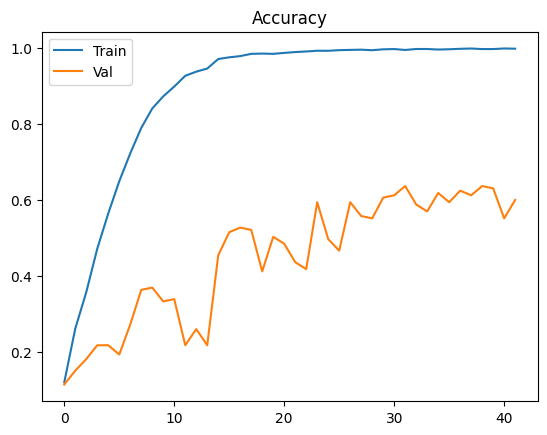

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend(); plt.title('Accuracy')

## PCA 학습

In [13]:
from keras_tuner.tuners import BayesianOptimization
from keras_tuner import HyperModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, LayerNormalization, Bidirectional, Attention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import joblib

# ─────────────────────────────────────────────
# 1. 데이터 준비 및 class weight 계산
best_k = 560
train, val = train_test_split(train_data, test_size=0.2, random_state=42,
                              stratify=[label for _, label in train_data])

train_labels = np.array([label for _, label in train])
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_labels), y=train_labels)
class_weight_dict = dict(enumerate(class_weights)) 

X_train_raw, y_train = make_augmented_dataset(train, augment_multiplier=10)
X_val_raw, y_val = make_augmented_dataset(val, augment_multiplier=0)

# ─────────────────────────────────────────────
# 2. PCA 적용
N_train, T, D = X_train_raw.shape
X_train_flat = X_train_raw.reshape(-1, D)

pca = PCA(n_components=best_k)
X_train_pca_flat = pca.fit_transform(X_train_flat)
X_train_k = X_train_pca_flat.reshape(N_train, T, best_k)

N_val = X_val_raw.shape[0]
X_val_flat = X_val_raw.reshape(-1, D)
X_val_pca_flat = pca.transform(X_val_flat)
X_val_k = X_val_pca_flat.reshape(N_val, T, best_k)

# PCA 저장 (나중에 test에도 동일하게 적용하려면 필수)
joblib.dump(pca, f"{DATASET_PATH}/pca_{best_k}.joblib")

# ─────────────────────────────────────────────
# 3. 라벨 처리
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_train = smooth_labels(y_train, smoothing=0.1)
num_classes = y_train.shape[1]
input_shape = (60, best_k)

# ─────────────────────────────────────────────
# 4. 튜닝 가능한 모델 정의
class LSTMGRUHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        inputs = Input(shape=self.input_shape)

        x = Bidirectional(LSTM(units=hp.Int('lstm_units', 32, 128, step=32), return_sequences=True))(inputs)
        x = LayerNormalization()(x)
        x = Dropout(hp.Float('lstm_dropout', 0.2, 0.5, step=0.1))(x)
        
        x = GRU(units=hp.Int('gru_units', 32, 128, step=32), return_sequences=True)(x)
        x = LayerNormalization()(x)
        x = Dropout(hp.Float('gru_dropout', 0.2, 0.5, step=0.1))(x)

        x = Attention()([x, x])
        x = GlobalAveragePooling1D()(x)

        x = Dense(units=hp.Int('dense_units', 32, 128, step=32), activation='relu')(x)
        x = Dropout(hp.Float('dense_dropout', 0.2, 0.5, step=0.1))(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)

        model = Model(inputs, outputs)
        model.compile(
            optimizer=Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

# ─────────────────────────────────────────────
# 5. 튜너 설정 및 탐색
hypermodel = LSTMGRUHyperModel(input_shape=input_shape, num_classes=num_classes)

tuner = BayesianOptimization(
    hypermodel,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name=f'sign_tune_pca{best_k}',
    overwrite=True
)

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-5,
    verbose=1
)

tuner.search(
    X_train_k, y_train,
    validation_data=(X_val_k, y_val),
    epochs=150,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        lr_schedule
    ],
    verbose=1
)


Trial 15 Complete [00h 01m 44s]
val_accuracy: 0.6242424249649048

Best val_accuracy So Far: 0.7030302882194519
Total elapsed time: 00h 24m 40s


In [14]:
import joblib

# 최적 모델/하이퍼파라미터 불러오기
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

# PCA 객체 저장
joblib.dump(pca, f"{DATASET_PATH}/pca_{best_k}.joblib")

# 성능 평가 및 출력
val_acc = best_model.evaluate(X_val_k, y_val, verbose=0)[1]
print(f" [PCA {best_k}] 튜너 기반 최적 모델의 검증 정확도: {val_acc:.4f}")
print(" Best Hyperparameters:", best_hp.values)

# 모델 저장 경로 생성
if not os.path.exists(f"{DATASET_PATH}/models"):
    os.makedirs(f"{DATASET_PATH}/models")

# 모델 저장
best_model.save(f"{DATASET_PATH}/models/best_pca{best_k}_hypertuning.keras")


 [PCA 560] 튜너 기반 최적 모델의 검증 정확도: 0.7030
 Best Hyperparameters: {'lstm_units': 128, 'lstm_dropout': 0.2, 'gru_units': 128, 'gru_dropout': 0.30000000000000004, 'dense_units': 128, 'dense_dropout': 0.4, 'lr': 0.002051026678741402}


In [18]:
#베스트 하이퍼파라미터로 재학습
from sklearn.decomposition import PCA
import joblib
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Bidirectional, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D, Attention
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

# 1. 증강 데이터 생성
train, val = train_test_split(train_data, test_size=0.2, random_state=42,
                              stratify=[label for _, label in train_data])
X_train_aug_raw, y_train_aug = make_augmented_dataset(train, augment_multiplier=10)
X_val_raw, y_val = make_augmented_dataset(val, augment_multiplier=0)

# 클래스 불균형 처리
y_train_labels = y_train_aug
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weight_dict = dict(enumerate(class_weights))

# 2. PCA 적용
best_k = 560
N_train, T, D = X_train_aug_raw.shape

X_train_flat = X_train_aug_raw.reshape(-1, D)
pca = PCA(n_components=best_k)
X_train_pca_flat = pca.fit_transform(X_train_flat)
X_train_aug = X_train_pca_flat.reshape(N_train, T, best_k)

N_val = X_val_raw.shape[0]
X_val_flat = X_val_raw.reshape(-1, D)
X_val_pca_flat = pca.transform(X_val_flat)
X_val = X_val_pca_flat.reshape(N_val, T, best_k)

# 3. 라벨 처리
num_classes = len(np.unique(y_train_aug))
y_train_aug = to_categorical(y_train_aug, num_classes=num_classes)
y_train_aug = smooth_labels(y_train_aug, smoothing=0.1)
y_val = to_categorical(y_val, num_classes=num_classes)

# 4. 모델 정의 (best_hp 없이 직접 지정)
input_shape = (60, best_k)
model_input = Input(shape=input_shape)

x = Bidirectional(LSTM(64, return_sequences=True))(model_input)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = GRU(units=96, return_sequences=True)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Attention()([x, x])
x = GlobalAveragePooling1D()(x)

x = Dense(units=96, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(model_input, output)
model.compile(
    optimizer=Adam(learning_rate=best_hp.get('lr')),  # best_hp 미사용 시 고정값도 가능
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. 학습
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)

history = model.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=64,

    callbacks=[early_stop, lr_schedule],
    verbose=1
)

# 6. 저장
model.save(f"{DATASET_PATH}/models/best_model_pca{best_k}_nonclassweight.keras")
joblib.dump(pca, f"{DATASET_PATH}/pca_{best_k}.joblib")


100%|██████████| 657/657 [04:32<00:00,  2.41it/s]


MemoryError: Unable to allocate 5.26 GiB for an array with shape (7227, 60, 1629) and data type float64

# 테스트

In [ ]:
# TOPK 테스트셋 평가
X_test_raw, y_test = make_augmented_dataset(test_data, augment_multiplier=0)
X_test = X_test_raw[:, :, topk]
y_test = to_categorical(y_test, num_classes=num_classes)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {acc:.4f}")

100%|██████████| 118/118 [00:37<00:00,  3.13it/s]

테스트 정확도: 0.7203


In [17]:
# PCA 테스트셋 평가
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
# 1. PCA 및 모델 로드
pca = joblib.load(f"{DATASET_PATH}/pca_560.joblib")
model = load_model(f"{DATASET_PATH}/models/best_model_pca560.keras")

# 2. test 데이터 준비 및 PCA 적용
X_test_raw, y_test = make_augmented_dataset(test_data, augment_multiplier=0)
N_test, T, D = X_test_raw.shape
X_test_flat = X_test_raw.reshape(-1, D)
X_test_pca_flat = pca.transform(X_test_flat)
X_test = X_test_pca_flat.reshape(N_test, T, 560)

# 3. 라벨 처리
y_test = to_categorical(y_test, num_classes=num_classes)

# 4. 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ PCA 기반 테스트 정확도: {acc:.4f}")


100%|██████████| 118/118 [00:43<00:00,  2.68it/s]


✅ PCA 기반 테스트 정확도: 0.6864


## k-fold validation

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization, Attention, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import numpy as np



# 설정
k = 5
topk_indices = np.load(f"{DATASET_PATH}/topk_indices_500.npy")
num_classes = len(np.unique([label for _, label in train_data]))



# K-Fold 학습
labels = np.array([label for _, label in train_data])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(np.zeros(len(train_data)), labels)):
    print(f"\n Fold {fold + 1}/5")

    # fold 단위로 raw train_data 분할
    train_data_split = [train_data[i] for i in train_idx]
    val_data_split = [train_data[i] for i in val_idx]

    # split된 fold에서 증강 수행
    X_train_raw, y_train = make_augmented_dataset(train_data_split, augment_multiplier=10)
    X_val_raw, y_val = make_augmented_dataset(val_data_split, augment_multiplier=0)

    # top-k 적용
    X_train = X_train_raw[:, :, topk_indices]
    X_val = X_val_raw[:, :, topk_indices]

    # 클래스 가중치
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights))

    # 라벨 처리
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_train = y_train * (1 - 0.1) + (0.1 / num_classes)  # Label Smoothing
    y_val = to_categorical(y_val, num_classes=num_classes)

    # 모델 정의
    input_shape = (60, len(topk_indices))
    model_input = Input(shape=input_shape)

    x = Bidirectional(LSTM(units=best_hp.get('lstm_units'), return_sequences=True))(model_input)
    x = BatchNormalization()(x)
    x = Dropout(best_hp.get('lstm_dropout'))(x)
    x = GRU(units=best_hp.get('gru_units'), return_sequences=True)(x)
    x = BatchNormalization()(x)
    x = Dropout(best_hp.get('gru_dropout'))(x)
    x = Attention()([x, x])
    x = GlobalAveragePooling1D()(x)
    x = Dense(units=best_hp.get('dense_units'), activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(model_input, output)
    model.compile(
        optimizer=Adam(learning_rate=best_hp.get('lr')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # 학습
    early_stop = EarlyStopping(patience=10, restore_best_weights=True)
    lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=150,
        batch_size=64,
        class_weight=class_weight_dict,
        callbacks=[early_stop, lr_schedule],
        verbose=1
    )

    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold + 1} Validation Accuracy: {val_acc:.4f}")
    fold_accuracies.append(val_acc)
    # 학습 완료 후 저장
    y_pred = np.argmax(model.predict(X_val), axis=1)
    y_true = np.argmax(y_val, axis=1)

    # 디렉토리 없으면 생성
    os.makedirs(f"{DATASET_PATH}/kfold_preds", exist_ok=True)
    np.save(f"{DATASET_PATH}/kfold_preds/fold{fold + 1}_pred.npy", y_pred)
    np.save(f"{DATASET_PATH}/kfold_preds/fold{fold + 1}_true.npy", y_true)

    # 모델 저장
    model.save(f"{DATASET_PATH}/models/kfold_fold{fold + 1}.keras")


# 최종 성능 출력
print(f"\n 평균 정확도: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
best_fold = np.argmax(fold_accuracies)
print(f"✅ Best Fold: Fold {best_fold+1} with accuracy {fold_accuracies[best_fold]:.4f}")



 Fold 1/5


100%|██████████| 165/165 [00:55<00:00,  2.95it/s]


Epoch 1/150
113/113 [==============================] - 5s 23ms/step - loss: 3.5069 - accuracy: 0.0899 - val_loss: 3.5974 - val_accuracy: 0.0303 - lr: 5.7222e-04
Epoch 2/150
113/113 [==============================] - 2s 17ms/step - loss: 3.0729 - accuracy: 0.2041 - val_loss: 3.3626 - val_accuracy: 0.1030 - lr: 5.7222e-04
Epoch 3/150
113/113 [==============================] - 2s 17ms/step - loss: 2.7403 - accuracy: 0.3064 - val_loss: 3.0028 - val_accuracy: 0.1697 - lr: 5.7222e-04
Epoch 4/150
113/113 [==============================] - 2s 17ms/step - loss: 2.4696 - accuracy: 0.3769 - val_loss: 3.3002 - val_accuracy: 0.1515 - lr: 5.7222e-04
Epoch 5/150
113/113 [==============================] - 2s 17ms/step - loss: 2.2631 - accuracy: 0.4501 - val_loss: 2.8785 - val_accuracy: 0.2606 - lr: 5.7222e-04
Epoch 6/150
113/113 [==============================] - 2s 17ms/step - loss: 2.0346 - accuracy: 0.5502 - val_loss: 3.0016 - val_accuracy: 0.2121 - lr: 5.7222e-04
Epoch 7/150
113/113 [=============

100%|██████████| 165/165 [00:51<00:00,  3.18it/s]


Epoch 1/150
113/113 [==============================] - 5s 29ms/step - loss: 3.4782 - accuracy: 0.1017 - val_loss: 3.6029 - val_accuracy: 0.0545 - lr: 5.7222e-04
Epoch 2/150
113/113 [==============================] - 2s 19ms/step - loss: 3.0662 - accuracy: 0.2041 - val_loss: 3.2243 - val_accuracy: 0.1394 - lr: 5.7222e-04
Epoch 3/150
113/113 [==============================] - 2s 19ms/step - loss: 2.7556 - accuracy: 0.2881 - val_loss: 2.9421 - val_accuracy: 0.1697 - lr: 5.7222e-04
Epoch 4/150
113/113 [==============================] - 2s 19ms/step - loss: 2.5036 - accuracy: 0.3627 - val_loss: 3.1068 - val_accuracy: 0.1576 - lr: 5.7222e-04
Epoch 5/150
113/113 [==============================] - 2s 19ms/step - loss: 2.2713 - accuracy: 0.4475 - val_loss: 2.4704 - val_accuracy: 0.3030 - lr: 5.7222e-04
Epoch 6/150
113/113 [==============================] - 2s 19ms/step - loss: 2.0394 - accuracy: 0.5442 - val_loss: 2.9104 - val_accuracy: 0.1697 - lr: 5.7222e-04
Epoch 7/150
113/113 [=============

100%|██████████| 164/164 [00:51<00:00,  3.19it/s]


Epoch 1/150
114/114 [==============================] - 5s 25ms/step - loss: 3.4944 - accuracy: 0.0946 - val_loss: 3.6657 - val_accuracy: 0.0671 - lr: 5.7222e-04
Epoch 2/150
114/114 [==============================] - 2s 19ms/step - loss: 3.1518 - accuracy: 0.1669 - val_loss: 3.3788 - val_accuracy: 0.1220 - lr: 5.7222e-04
Epoch 3/150
114/114 [==============================] - 2s 19ms/step - loss: 2.8778 - accuracy: 0.2465 - val_loss: 3.3479 - val_accuracy: 0.0793 - lr: 5.7222e-04
Epoch 4/150
114/114 [==============================] - 2s 20ms/step - loss: 2.6546 - accuracy: 0.3059 - val_loss: 2.9788 - val_accuracy: 0.1280 - lr: 5.7222e-04
Epoch 5/150
114/114 [==============================] - 2s 20ms/step - loss: 2.3940 - accuracy: 0.4061 - val_loss: 3.3415 - val_accuracy: 0.1280 - lr: 5.7222e-04
Epoch 6/150
114/114 [==============================] - 2s 20ms/step - loss: 2.1631 - accuracy: 0.4910 - val_loss: 2.9482 - val_accuracy: 0.2439 - lr: 5.7222e-04
Epoch 7/150
114/114 [=============

100%|██████████| 164/164 [00:23<00:00,  7.09it/s]


Epoch 1/150
114/114 [==============================] - 5s 24ms/step - loss: 3.4688 - accuracy: 0.0942 - val_loss: 3.5349 - val_accuracy: 0.0549 - lr: 5.7222e-04
Epoch 2/150
114/114 [==============================] - 2s 20ms/step - loss: 3.0417 - accuracy: 0.2014 - val_loss: 3.2896 - val_accuracy: 0.1037 - lr: 5.7222e-04
Epoch 3/150
114/114 [==============================] - 2s 19ms/step - loss: 2.7606 - accuracy: 0.2835 - val_loss: 3.1400 - val_accuracy: 0.1646 - lr: 5.7222e-04
Epoch 4/150
114/114 [==============================] - 2s 19ms/step - loss: 2.5018 - accuracy: 0.3634 - val_loss: 3.0170 - val_accuracy: 0.1707 - lr: 5.7222e-04
Epoch 5/150
114/114 [==============================] - 2s 19ms/step - loss: 2.2652 - accuracy: 0.4414 - val_loss: 4.1128 - val_accuracy: 0.1646 - lr: 5.7222e-04
Epoch 6/150
114/114 [==============================] - 2s 19ms/step - loss: 2.0464 - accuracy: 0.5329 - val_loss: 3.6428 - val_accuracy: 0.1402 - lr: 5.7222e-04
Epoch 7/150
114/114 [=============

100%|██████████| 164/164 [00:02<00:00, 66.25it/s]


Epoch 1/150
114/114 [==============================] - 5s 25ms/step - loss: 3.4665 - accuracy: 0.0966 - val_loss: 3.4918 - val_accuracy: 0.0915 - lr: 5.7222e-04
Epoch 2/150
114/114 [==============================] - 2s 19ms/step - loss: 3.0844 - accuracy: 0.1843 - val_loss: 3.3767 - val_accuracy: 0.1341 - lr: 5.7222e-04
Epoch 3/150
114/114 [==============================] - 2s 19ms/step - loss: 2.7815 - accuracy: 0.2700 - val_loss: 3.2815 - val_accuracy: 0.2073 - lr: 5.7222e-04
Epoch 4/150
114/114 [==============================] - 2s 19ms/step - loss: 2.5525 - accuracy: 0.3421 - val_loss: 3.2440 - val_accuracy: 0.1159 - lr: 5.7222e-04
Epoch 5/150
114/114 [==============================] - 2s 19ms/step - loss: 2.3187 - accuracy: 0.4301 - val_loss: 2.8344 - val_accuracy: 0.2744 - lr: 5.7222e-04
Epoch 6/150
114/114 [==============================] - 2s 19ms/step - loss: 2.1128 - accuracy: 0.4996 - val_loss: 2.4763 - val_accuracy: 0.3171 - lr: 5.7222e-04
Epoch 7/150
114/114 [=============

In [26]:
from tensorflow.keras.models import load_model


# 1. 최적 fold의 모델 로드
best_model_path = f"{DATASET_PATH}/models/kfold_fold{best_fold + 1}.keras"
best_model = load_model(best_model_path)

# 2. 테스트셋 전처리
X_test_raw, y_test = make_augmented_dataset(test_data, augment_multiplier=0)
X_test = X_test_raw[:, :, topk_indices]
y_test = to_categorical(y_test, num_classes=num_classes)

# 3. 테스트셋 평가
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f" 테스트 정확도: {test_acc:.4f}")




100%|██████████| 118/118 [00:35<00:00,  3.35it/s]


 테스트 정확도: 0.7203


4/4 [==============================] - 0s 15ms/step


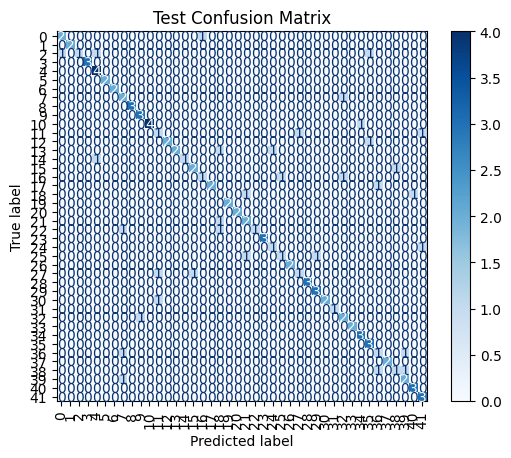

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.argmax(best_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title("Test Confusion Matrix")
plt.show()


## 5개 모델 앙상블

In [33]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score

# 저장된 모델 경로 리스트
model_paths = [
    f"{DATASET_PATH}/models/kfold_fold{i + 1}.keras" for i in range(5)
]

# 모델들 로드
all_models = [load_model(path) for path in model_paths]


In [34]:
# 테스트셋 로드 및 전처리
X_test_raw, y_test = make_augmented_dataset(test_data, augment_multiplier=0)
X_test = X_test_raw[:, :, topk_indices]  # top-k feature 적용
y_test = to_categorical(y_test, num_classes=num_classes)


100%|██████████| 118/118 [00:01<00:00, 82.48it/s]


In [35]:
# 각 모델 예측 → 평균
ensemble_preds = np.mean([model.predict(X_test) for model in all_models], axis=0)

# 최종 예측
y_pred = np.argmax(ensemble_preds, axis=1)
y_true = np.argmax(y_test, axis=1)

# 정확도
ensemble_acc = accuracy_score(y_true, y_pred)
print(f"✅ K-Fold 모델 앙상블 테스트 정확도: {ensemble_acc:.4f}")


4/4 [==============================] - 0s 7ms/step
✅ K-Fold 모델 앙상블 테스트 정확도: 0.7627


c:\Users\chaeyeonhan\anaconda3\envs\sign_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50521 (\N{HANGUL SYLLABLE ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\chaeyeonhan\anaconda3\envs\sign_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\chaeyeonhan\anaconda3\envs\sign_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


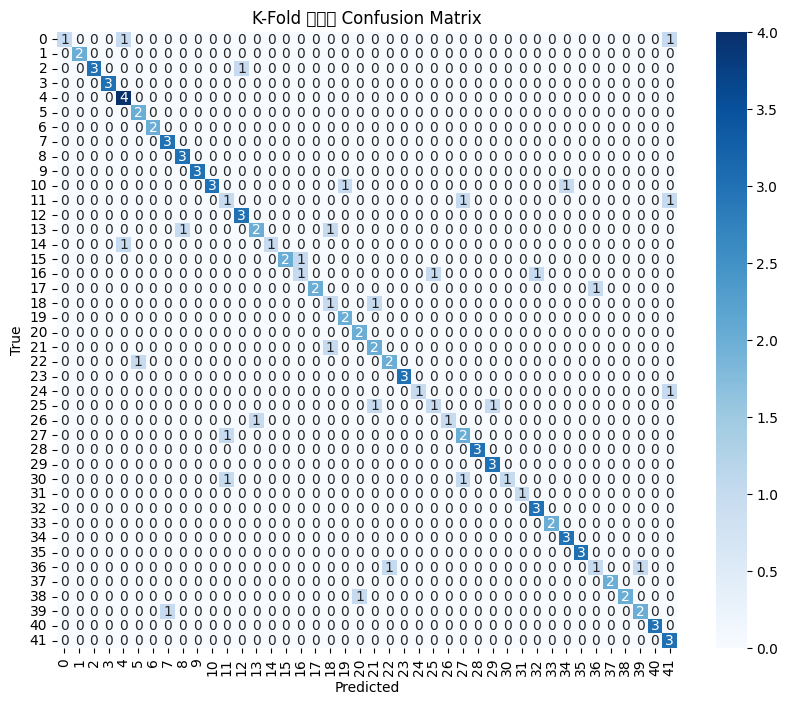

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("K-Fold 앙상블 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

per_class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(12, 4))
plt.bar(range(len(per_class_acc)), per_class_acc)
plt.xticks(range(len(per_class_acc)), class_names, rotation=90)
plt.ylim(0, 1)
plt.title("Class-wise Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.tight_layout()
plt.show()


In [38]:
from sklearn.metrics import classification_report
class_names = [label for label, idx in sorted(label_map.items(), key=lambda x: x[1])]
print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

         all       1.00      0.33      0.50         3
         bed       1.00      1.00      1.00         2
      before       1.00      0.75      0.86         4
       black       1.00      1.00      1.00         3
        book       0.67      1.00      0.80         4
     bowling       0.67      1.00      0.80         2
         can       1.00      1.00      1.00         2
       candy       0.75      1.00      0.86         3
       chair       0.75      1.00      0.86         3
     clothes       1.00      1.00      1.00         3
    computer       1.00      0.60      0.75         5
        cool       0.33      0.33      0.33         3
      cousin       0.75      1.00      0.86         3
       drink       0.67      0.50      0.57         4
      family       1.00      0.50      0.67         2
      finish       1.00      0.67      0.80         3
        fish       0.50      0.33      0.40         3
          go       1.00    

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

# 실제로 연산을 GPU에서 수행했는지 로그로 확인
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0]])
b = tf.constant([[3.0], [4.0]])
c = tf.matmul(a, b)
print(c)


2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([[11.]], shape=(1, 1), dtype=float32)


In [1]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


c:\Users\chaeyeonhan\anaconda3\envs\sign_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch version: 1.10.2+cu113
CUDA available: True
GPU name: NVIDIA GeForce RTX 4060


# GRU
